In [1]:
%matplotlib inline
import json
import os
import pandas as pd
import numpy as np
import fastcluster
from scipy.cluster.hierarchy import dendrogram, to_tree
import seaborn as sns
from ete3 import Tree, ClusterTree, TreeStyle, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node

In [2]:
input_dir = "/media/pika/Workbench/workspace/pywgMLST/validation/new_profiling_2.6.0"
profile_file = os.path.join(input_dir, "wgmlst.tsv")

In [3]:
profiles = pd.read_csv(profile_file, sep="\t", index_col=0)
profiles

,Assembly_1,Assembly_2,Assembly_3,Assembly_4,Assembly_5,Assembly_6
SAL0000002,afdb416ea6b1f92bc4b334d4ada1e9219c6e5b216d3c3d...,47dc22d91d233449eb7600b4ad4edfdcd27e35379a52cf...,NaN,afdb416ea6b1f92bc4b334d4ada1e9219c6e5b216d3c3d...,afdb416ea6b1f92bc4b334d4ada1e9219c6e5b216d3c3d...,afdb416ea6b1f92bc4b334d4ada1e9219c6e5b216d3c3d...
SAL0000003,6c64273132190e5b745eeb52f60dd972c85121d9eb5995...,285ef15e7731739b35fcfe7b99b3d424126c9ce83f1b55...,NaN,6c64273132190e5b745eeb52f60dd972c85121d9eb5995...,6c64273132190e5b745eeb52f60dd972c85121d9eb5995...,6c64273132190e5b745eeb52f60dd972c85121d9eb5995...
SAL0000004,01586a227d2bab031312f15f5ba28112177432bfb6f58f...,4f3085e6d51380128269d1942afd30d4c9e4f1f405b6c5...,NaN,01586a227d2bab031312f15f5ba28112177432bfb6f58f...,01586a227d2bab031312f15f5ba28112177432bfb6f58f...,01586a227d2bab031312f15f5ba28112177432bfb6f58f...
SAL0000005,8e88d0dd4163a1839406674784fbef7516155aa1aedb2a...,b0b3b026375159cc5d1f026c9dd55f45b829abeab88f64...,NaN,8e88d0dd4163a1839406674784fbef7516155aa1aedb2a...,8e88d0dd4163a1839406674784fbef7516155aa1aedb2a...,8e88d0dd4163a1839406674784fbef7516155aa1aedb2a...
SAL0000006,d567ba4d387b5dd0cf552c2fecd8ac816e3a65e85092a5...,c5c447fb22f7dcd7b2884eb6bd85571d0f4c8851f431f5...,NaN,d567ba4d387b5dd0cf552c2fecd8ac816e3a65e85092a5...,d567ba4d387b5dd0cf552c2fecd8ac816e3a65e85092a5...,d567ba4d387b5dd0cf552c2fecd8ac816e3a65e85092a5...
SAL0000007,d2e9aada7cf91748f066b197c2fbf7b6c9f69af6d4316d...,d2e9aada7cf91748f066b197c2fbf7b6c9f69af6d4316d...,NaN,d2e9aada7cf91748f066b197c2fbf7b6c9f69af6d4316d...,d2e9aada7cf91748f066b197c2fbf7b6c9f69af6d4316d...,NaN
SAL0000008,cebf49ba048ba85316d002c7b4c14eb2a8ee351c927b61...,97e085ffa4a425b9e7be7ad67da1693863aedc1c1887bf...,NaN,cebf49ba048ba85316d002c7b4c14eb2a8ee351c927b61...,cebf49ba048ba85316d002c7b4c14eb2a8ee351c927b61...,97e085ffa4a425b9e7be7ad67da1693863aedc1c1887bf...
SAL0000009,75cf01bbc167dfc034b978a344860597184143f67ecdda...,dcad8ff67ab66dbc72902b2d7bca6f05e725162d1db24d...,NaN,75cf01bbc167dfc034b978a344860597184143f67ecdda...,75cf01bbc167dfc034b978a344860597184143f67ecdda...,NaN
SAL0000010,3345410422e3a2323d27342e10620b082661131696f535...,51e1d1be1feaf829f7a4f4b1d4210f758cfb9fa542c04b...,NaN,3345410422e3a2323d27342e10620b082661131696f535...,3345410422e3a2323d27342e10620b082661131696f535...,NaN
SAL0000011,05b75f7487743dcdf1c08b9c4d567e5e9d500afe3d03fc...,c13cbcd0865bbc648398b4a632b1d69ef1fa4c3612a284...,NaN,NaN,NaN,NaN


In [11]:
profiles = profiles.iloc[0:3504, :]

In [6]:
def hamming(xs, ys):
    results = 0
    for x, y in zip(xs, ys):
        if x != y:
            results += 1
    return results

In [4]:
def hamming(xs, ys):
    results = 0
    for x, y in zip(xs, ys):
        if type(x) == str and type(y) == str and x == y:
            pass
        elif type(x) == float and type(y) == float:
            pass
        else:
            results += 1
    return results

In [5]:
distances = pd.DataFrame(index=profiles.columns, columns=profiles.columns)
for x in profiles.columns:
    for y in profiles.columns:
        distances.loc[x, y] = hamming(profiles[x], profiles[y])

In [6]:
distances

,Assembly_1,Assembly_2,Assembly_3,Assembly_4,Assembly_5,Assembly_6
Assembly_1,0,3163,3216,348,347,3001
Assembly_2,3163,0,3248,3157,3156,3157
Assembly_3,3216,3248,0,3161,3160,703
Assembly_4,348,3157,3161,0,5,2945
Assembly_5,347,3156,3160,5,0,2946
Assembly_6,3001,3157,703,2945,2946,0


In [7]:
linkage = fastcluster.average(distances)

In [8]:
tree = to_tree(linkage, False)

In [9]:
def linkage2newick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "{}:{:.2f}{}".format(leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):{:.2f}{}".format(parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = linkage2newick(node.get_left(), newick, node.dist, leaf_names)
        newick = linkage2newick(node.get_right(), ",{}".format(newick), node.dist, leaf_names)
        newick = "({}".format(newick)
        return newick

In [10]:
newick = linkage2newick(tree, "", tree.dist, list(profiles.columns))

In [11]:
t = Tree(newick)
print(t)


         /-Assembly_6
      /-|
   /-|   \-Assembly_3
  |  |
  |   \-Assembly_2
--|
  |      /-Assembly_5
  |   /-|
   \-|   \-Assembly_4
     |
      \-Assembly_1


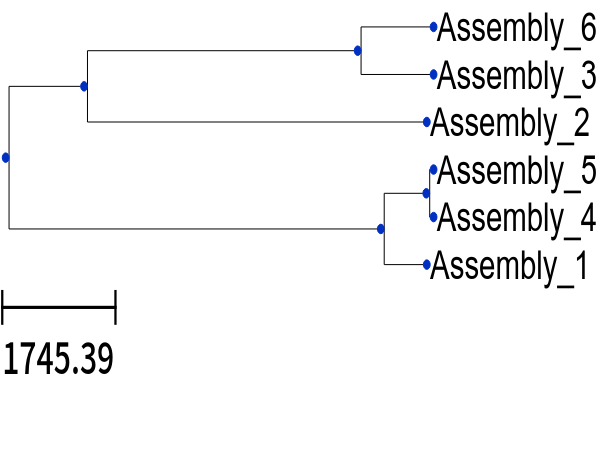

In [12]:
t.render("%%inline", w=600, h=450, units="px")

In [23]:
with open(joinpath(input_dir, "S.Heidelberg.newick"), "w") as file:
    file.write(newick)